In [1]:
#We don't use all 12k or whatever samples; makes it too easy; we sub sample, take 5k total for training, testing and validation

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [2]:
import os, shutil, pathlib

In [3]:
original_dir = pathlib.Path(r"path to catsvsdogs\train")

In [4]:
new_base_dir = pathlib.Path(r"path to catsvsdogs\catsvsdogs_small")

In [5]:
def make_subset(subset_name, start_index, end_index): 
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)
            
make_subset('train', 0, 1000)
make_subset('validation', 1000, 1500)
make_subset('test', 1500, 2500)

'def make_subset(subset_name, start_index, end_index): \n    for category in ("cat", "dog"):\n        dir = new_base_dir / subset_name / category\n        os.makedirs(dir)\n        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]\n        for fname in fnames:\n            shutil.copyfile(src=original_dir / fname, dst=dir / fname)\n            \nmake_subset(\'train\', 0, 1000)\nmake_subset(\'validation\', 1000, 1500)\nmake_subset(\'test\', 1500, 2500)'

In [5]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

In [6]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)

outputs=layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856 

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory as idfd

In [8]:
train_dataset = idfd(new_base_dir/'train',
                    image_size=(180, 180),
                    batch_size=32)

val_dataset = idfd(new_base_dir/'validation',
                  image_size=(180, 180),
                  batch_size=32)

test_dataset = idfd(new_base_dir/'test',
                   image_size=(180, 180),
                   batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [10]:
for data_batch, label_batch in train_dataset:
    print(data_batch.shape, ", ", label_batch.shape, "\n")
    break

(32, 180, 180, 3) ,  (32,) 



In [9]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath = 'catsvsdogs_convnet.keras',
                                   save_best_only=True,
                                   monitor='val_loss')]



In [12]:
#history = model.fit(train_dataset, epochs=30, validation_data=val_dataset, callbacks=callbacks)

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("catsvsdogs_convnet.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(test_acc)

In [10]:
#INTENSE OVERFITTING
# =>INTRODUCE DATA AUGMENTATION
data_aug = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

In [11]:
inputs = keras.Input(shape = (180, 180, 3))
x = data_aug(inputs)

x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)

outputs=layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
print('\n\n\n')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 41, 41, 128)       7385

In [12]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 40s 614ms/step - loss: 0.6911 - accuracy: 0.5245 - val_loss: 0.6821 - val_accuracy: 0.5710
Epoch 2/10
63/63 [==============================] - 38s 607ms/step - loss: 0.6778 - accuracy: 0.5780 - val_loss: 0.6600 - val_accuracy: 0.6250
Epoch 3/10
63/63 [==============================] - 38s 609ms/step - loss: 0.6455 - accuracy: 0.6460 - val_loss: 0.6556 - val_accuracy: 0.6090
Epoch 4/10
63/63 [==============================] - 39s 618ms/step - loss: 0.6256 - accuracy: 0.6470 - val_loss: 0.6192 - val_accuracy: 0.6560
Epoch 5/10
63/63 [==============================] - 39s 616ms/step - loss: 0.5859 - accuracy: 0.6815 - val_loss: 0.6510 - val_accuracy: 0.6650
Epoch 6/10
63/63 [==============================] - 39s 619ms/step - loss: 0.5359 - accuracy: 0.7290 - val_loss: 0.6015 - val_accuracy: 0.7040
Epoch 7/10
63/63 [==============================] - 39s 619ms/step - loss: 0.4741 - accuracy: 0.7685 - val_loss: 0.7594 - val_accuracy: 0.6370

In [13]:
test_model = keras.models.load_model("catsvsdogs_convnet.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(test_acc)

63/63 [==============================] - 9s 138ms/step - loss: 0.5982 - accuracy: 0.6940
0.6940000057220459


# USING TRANSFER LEARNING (VGG16 MODEL)

In [14]:
conv_base = keras.applications.vgg16.VGG16(weights='imagenet',
                                         include_top=False,
                                         input_shape=(180, 180, 3))

In [15]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [16]:
#Fast technique: Extracting features and labels, running as a normal ML model without data augmentation

import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [17]:
train_features, train_labels = get_features_and_labels(train_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)
val_features, val_labels = get_features_and_labels(val_dataset)

In [18]:
train_features.shape

(2000, 5, 5, 512)

In [19]:
#Defining and training densely connected classifier

inputs = keras.Input(shape=(5,5,512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

callbacks = [keras.callbacks.ModelCheckpoint(
     filepath="feature_extraction.keras",
     save_best_only=True,
     monitor="val_loss")]

In [ ]:

history = model.fit(
 train_features, train_labels,
 epochs=20,
 validation_data=(val_features, val_labels),
 callbacks=callbacks)

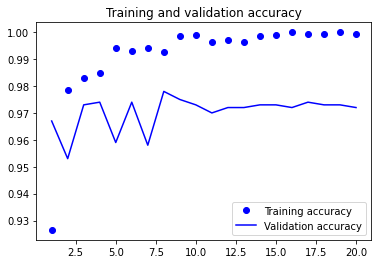

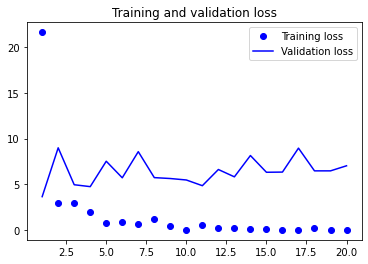

In [29]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [30]:
#There is still overfitting => use data aug

In [20]:
conv_base = keras.applications.vgg16.VGG16(weights='imagenet',
                                          include_top=False)
conv_base.trainable = False #Freezes weights, so that there's no modeification of already learned weights

In [21]:
inputs = keras.Input(shape=(180,180,3))
x = data_aug(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

callbacks = [keras.callbacks.ModelCheckpoint(
     filepath="feature_extraction_with_aug.keras",
     save_best_only=True,
     monitor="val_loss")]

In [ ]:

history = model.fit(
 train_dataset,
 epochs=10,
 validation_data=val_dataset,
 callbacks=callbacks)

# FINE-TUNING PRE-TRAINED MODEL

Unfreezing weights of some top layers (closest to dense fc layer/s) so that they can be trained 

In [22]:
#for example:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

We unfreeze and retrain all the layers of block 5

In [23]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [26]:
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=1e-5), metrics=["accuracy"])

callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="fine_tuning.keras",
 save_best_only=True,
 monitor="val_loss")
]

history = model.fit(
 train_dataset,
 epochs=5,
 validation_data=val_dataset,
 callbacks=callbacks)

Epoch 1/5
63/63 [==============================] - 130s 2s/step - loss: 4.1673 - accuracy: 0.7365 - val_loss: 0.7031 - val_accuracy: 0.9320
Epoch 2/5
63/63 [==============================] - 128s 2s/step - loss: 1.2063 - accuracy: 0.8840 - val_loss: 0.3509 - val_accuracy: 0.9440
Epoch 3/5
63/63 [==============================] - 132s 2s/step - loss: 0.5541 - accuracy: 0.9120 - val_loss: 0.2583 - val_accuracy: 0.9570
Epoch 4/5
63/63 [==============================] - 131s 2s/step - loss: 0.4982 - accuracy: 0.9170 - val_loss: 0.2210 - val_accuracy: 0.9590
Epoch 5/5
63/63 [==============================] - 133s 2s/step - loss: 0.3201 - accuracy: 0.9340 - val_loss: 0.2101 - val_accuracy: 0.9460


In [27]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 72s 1s/step - loss: 0.2189 - accuracy: 0.9610
Test accuracy: 0.961
